**Pergunta :** O nivel de escolaridade afeta a chance de uma pessoa perder o emprego?

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [2]:
desemprego_por_escolaridade = pd.read_csv("oecd.csv")
desemprego_por_escolaridade.drop(['INDICATOR','MEASURE','FREQUENCY','Flag Codes'], axis=1, inplace=True)
data1=desemprego_por_escolaridade
data1.head()

,LOCATION,SUBJECT,TIME,Value
0,DEU,BUPPSRY,1997,16.671282
1,DEU,BUPPSRY,1998,16.517719
2,DEU,BUPPSRY,1999,15.599174
3,DEU,BUPPSRY,2000,13.665389
4,DEU,BUPPSRY,2001,13.515862


In [3]:
desemprego= pd.read_excel('desemprego_total.xls')
desemprego.drop(['Indicator Name','Indicator Code','Country Name'], axis=1, inplace=True)
desemprego.head(3)

,Country Code,YEARS,"Unemployment, total (% of total labor force)"
0,DEU,1997,9.863
1,DEU,1998,9.788
2,DEU,1999,8.855


In [7]:
#Cruza as duas tabelas

data1 = pd.concat([desemprego_por_escolaridade, desemprego], axis=1, join='inner')
data1 = pd.concat([desemprego_por_escolaridade, desemprego], axis=1).reindex(desemprego_por_escolaridade.index)
data1.drop(['YEARS','Country Code'], axis=1, inplace=True)
data1.head()

,LOCATION,SUBJECT,TIME,Value,"Unemployment, total (% of total labor force)"
0,DEU,BUPPSRY,1997,16.671282,9.863
1,DEU,BUPPSRY,1998,16.517719,9.788
2,DEU,BUPPSRY,1999,15.599174,8.855
3,DEU,BUPPSRY,2000,13.665389,7.917
4,DEU,BUPPSRY,2001,13.515862,7.773


In [38]:
data1.rename(columns={'SUBJECT':'Escolaridade','Unemployment, total (% of total labor force)':'Desemprego'}, inplace=True)
data1["Escolaridade"]= data1["Escolaridade"].str.replace("BUPPSRY", "Prim_sem_Secun", case = False)
data1["Escolaridade"]=data1["Escolaridade"].str.replace("UPPSRY_NTRY", "Com_Secun_sem_superior", case = False) 
data1["Escolaridade"]=data1["Escolaridade"].str.replace("TRY", "Com_ens_superior", case = False) 
data1["LOCATION"]=data1["LOCATION"].str.replace("DEU", "Alem", case = False)
data1["LOCATION"]=data1["LOCATION"].str.replace("USA", "Eua", case = False)
data1["LOCATION"]=data1["LOCATION"].str.replace("KOR", "Coreia", case = False)
data1.head()

,LOCATION,Escolaridade,TIME,Value,Desemprego
0,Alem,Prim_sem_Secun,1997,16.671282,9.863
1,Alem,Prim_sem_Secun,1998,16.517719,9.788
2,Alem,Prim_sem_Secun,1999,15.599174,8.855
3,Alem,Prim_sem_Secun,2000,13.665389,7.917
4,Alem,Prim_sem_Secun,2001,13.515862,7.773


In [39]:
data1.set_index('LOCATION')
Alemanha = data1.loc[(data1['LOCATION'])=="Alem"]  
Eua=data1.loc[(data1['LOCATION'])=='Eua']
Coreia=data1.loc[(data1['LOCATION'])=='Coreia']

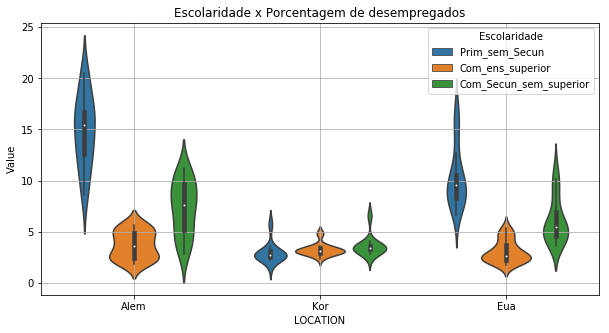

In [30]:
plt.figure(1, figsize=(10,5))

sns.violinplot(
    data=data1,
    x="LOCATION",
    y='Value',
    hue='Escolaridade',
    kind='box',
    height=50, 
    aspect=50) 
plt.title('Escolaridade x Porcentagem de desempregados')
plt.grid(True)
plt.show()

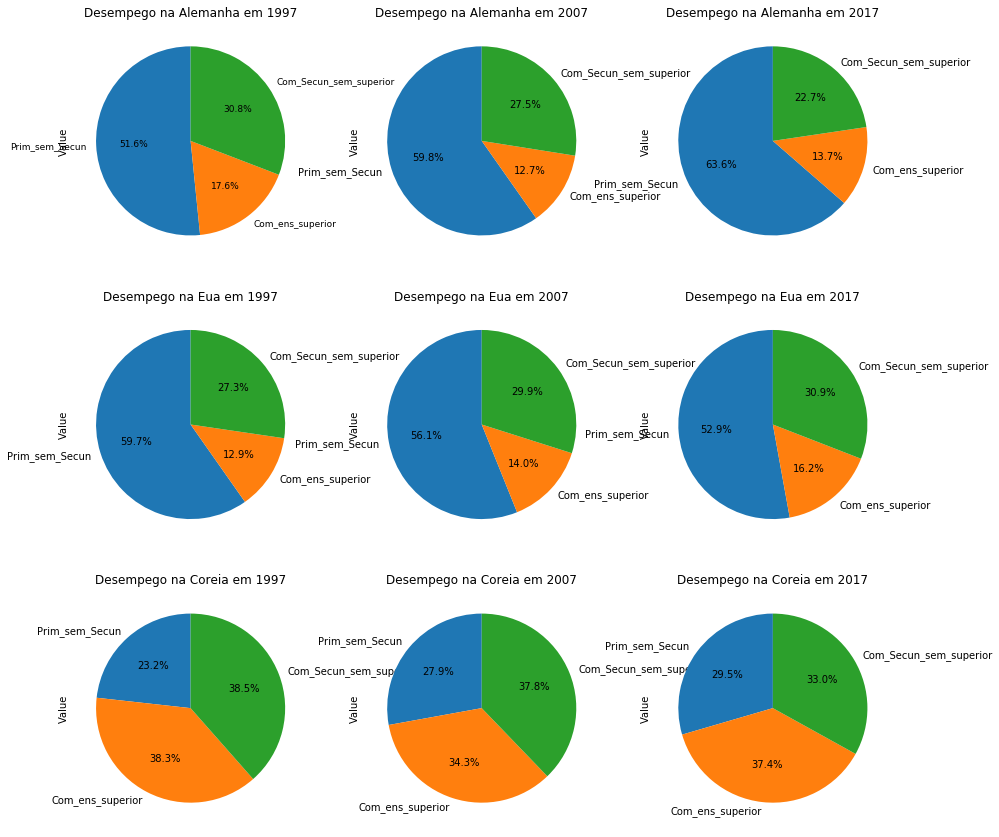

In [41]:
Alem1997=Alemanha.loc[(Alemanha['TIME'])==1997]
Alem2007=Alemanha.loc[(Alemanha['TIME'])==2007]
Alem2017=Alemanha.loc[(Alemanha['TIME'])==2017]

Eua1997=Eua.loc[(Eua['TIME'])==1997]
Eua2007=Eua.loc[(Eua['TIME'])==2007]
Eua2017=Eua.loc[(Eua['TIME'])==2017]

Coreia1997=Coreia.loc[(Coreia['TIME'])==1997]
Coreia2007=Coreia.loc[(Coreia['TIME'])==2007]
Coreia2017=Coreia.loc[(Coreia['TIME'])==2017]


plt.figure(1, figsize=(20,20))
the_grid = GridSpec(4, 4)

#Alemanha
ax1 = plt.subplot(the_grid[0, 0], aspect=1, title="Desempego na Alemanha em 1997")
Alem1997.plot(kind='pie', y = 'Value', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Alem1997['Escolaridade'], legend = False, fontsize=9)


ax2 = plt.subplot(the_grid[0, 1], aspect=1, title="Desempego na Alemanha em 2007")
Alem2007.plot(kind='pie', y = 'Value', ax=ax2, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Alem2007['Escolaridade'], legend = False, fontsize=10)


ax3 = plt.subplot(the_grid[0, 2], aspect=1, title="Desempego na Alemanha em 2017")
Alem2017.plot(kind='pie', y = 'Value', ax=ax3, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Alem2017['Escolaridade'], legend = False, fontsize=10)

#Eua
ax4 = plt.subplot(the_grid[1, 0], aspect=1, title="Desempego na Eua em 1997")
Eua1997.plot(kind='pie', y = 'Value', ax=ax4, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Eua1997['Escolaridade'], legend = False, fontsize=10)


ax5 = plt.subplot(the_grid[1, 1], aspect=1, title="Desempego na Eua em 2007")
Eua2007.plot(kind='pie', y = 'Value', ax=ax5, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Eua2007['Escolaridade'], legend = False, fontsize=10)


ax6 = plt.subplot(the_grid[1, 2], aspect=1, title="Desempego na Eua em 2017")
Eua2017.plot(kind='pie', y = 'Value', ax=ax6, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Eua2017['Escolaridade'], legend = False, fontsize=10)

#Coreia
ax7 = plt.subplot(the_grid[2, 0], aspect=1, title="Desempego na Coreia em 1997")
Coreia1997.plot(kind='pie', y = 'Value', ax=ax7, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Coreia1997['Escolaridade'], legend = False, fontsize=10)


ax8 = plt.subplot(the_grid[2, 1], aspect=1, title="Desempego na Coreia em 2007")
Coreia2007.plot(kind='pie', y = 'Value', ax=ax8, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Coreia2007['Escolaridade'], legend = False, fontsize=10)


ax9 = plt.subplot(the_grid[2, 2], aspect=1, title="Desempego na Coreia em 2017")
Coreia2017.plot(kind='pie', y = 'Value', ax=ax9, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Coreia2017['Escolaridade'], legend = False, fontsize=10)
plt.show()


